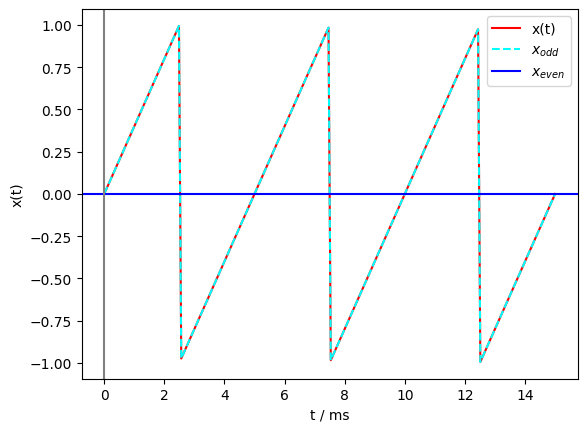

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#Task 1b

t = np.linspace(0, 15, 200, endpoint=True) 



#def even(n):
#    return ((4*np.sin((5/2)*n*omega))/(5*n*omega))*np.cos(2*n*omega*t/5)
  
# Plot the sawtooth wave 
plt.plot(t, signal.sawtooth(2 * np.pi * 1/5 * t + np.pi), color='red', label='x(t)') 
plt.plot(t, signal.sawtooth(2 * np.pi * 1/5 * t + np.pi), color='cyan', linestyle='dashed', label='$x_{odd}$') 
#plt.plot(t, 0)
#plt.plot(t, sigma_sum(-10, 10, even), 'b', label = '$x_{even}$')

  
# Give x, y, title axis label 
plt.ylabel('x(t)') 
plt.xlabel('t / ms') 
plt.axhline(0, color='blue', label='$x_{even}$')
plt.axvline(0,color='grey')
plt.legend()
  
# Display 
plt.show()

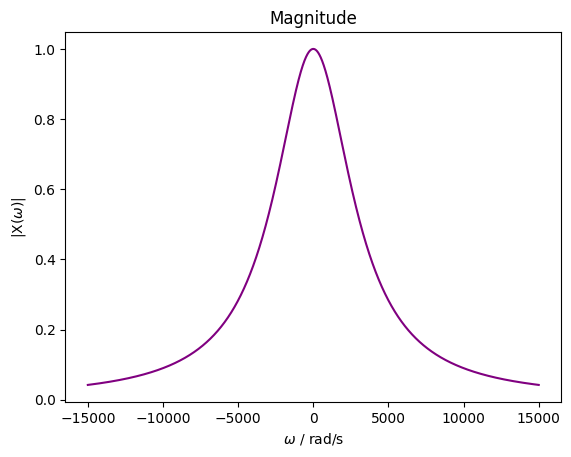

In [3]:
alpha = 1000*np.pi

w = np.linspace((-15*(10**3)), (15*(10**3)), 10000, endpoint=True)
H = (1/((alpha+1j*w)**2))*(alpha**2)

magnutide = np.abs(H)
phase = np.angle(H)

# Plot
plt.plot(w, magnutide, color='purple')
plt.title('Magnitude')
plt.ylabel('|X($\omega$)|')
plt.xlabel('$\omega$ / rad/s')
plt.show()

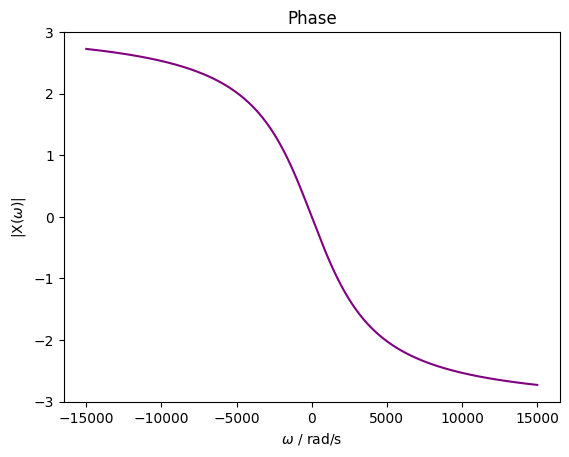

In [4]:
# Plot
plt.plot(w, phase, color='purple')
plt.ylabel('|X($\omega$)|')
plt.xlabel('$\omega$ / rad/s')
plt.title('Phase')
plt.show()

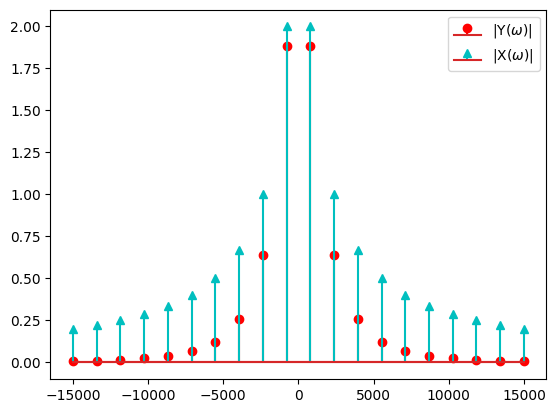

In [5]:
T0 = 5 * 10**(-3)
w0 = (2 * np.pi) /T0
start = -15000
stop = 15000
steps = 100
w = np.linspace(start, stop, steps)

def sigma_sum(start, end, expression):
   return sum(expression(i) for i in range(start, end+1)) #+1 eftersom range inte tar med sista siffran

def cnX(n):
    if n == 0:
        return 0
    return 1j * 1/(n*np.pi) * (-1)**n

def dirac(n):
    dd = np.zeros(w.shape)
    middle = int(len(w)/2)
    one_step = (stop - start)/steps
    shift = (w0 * n) / one_step
    dd[middle + int(shift)] = 1
    return dd

def sumFuncX(n):
    return  np.multiply(cnX(n), dirac(n))

def zero_remove(array):
    new_array = []
    for n in array:
        if n != 0:
            new_array.append(n)

    return new_array


X = 2*np.pi * sigma_sum(-10,10, sumFuncX)
x_zero_removed = zero_remove(X)

new_w = np.linspace(start, stop, len(x_zero_removed))

newH = (1/((alpha+1j*new_w)**2))*(alpha**2)

Y=np.multiply(x_zero_removed, newH)

y_zero_removed = zero_remove(Y)

new_ww = np.linspace(start, stop, len(y_zero_removed))

plt.stem(new_ww, np.abs(y_zero_removed), 'r', label='|Y($\omega$)|', markerfmt='o')

plt.stem(new_w, np.abs(x_zero_removed), 'c', label='|X($\omega$)|', markerfmt='^')

plt.legend()
plt.show()

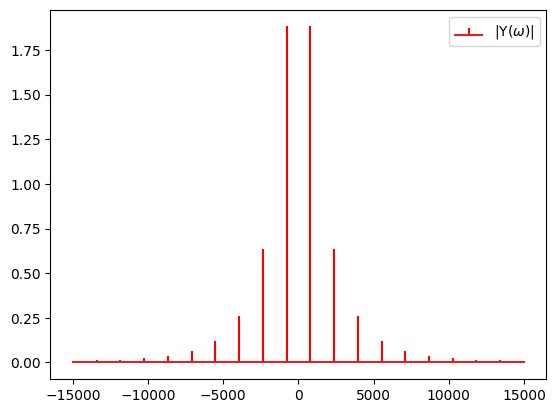

In [6]:
newH = (1/((alpha+1j*new_w)**2))*(alpha**2)

Y=np.multiply(x_zero_removed, newH)

y_zero_removed = zero_remove(Y)

new_ww = np.linspace(start, stop, len(y_zero_removed))

plt.stem(new_ww, np.abs(y_zero_removed), 'r', label='|Y($\omega$)|', markerfmt=' ')

plt.legend()
plt.show()

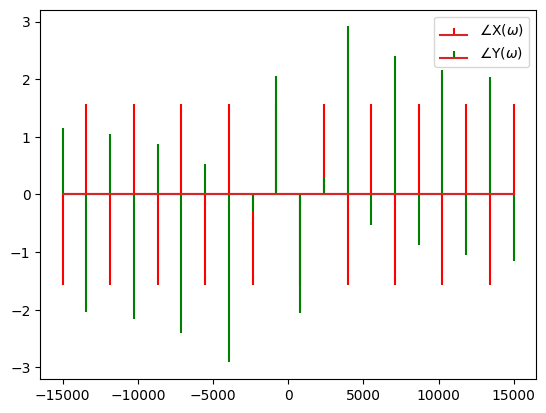

In [7]:
start = -15000
stop = 15000
steps = 10000
s = np.linspace(start, stop, steps)

#Y=np.multiply(X,H)

plt.stem(new_w, np.angle(x_zero_removed), 'r', label='$\\angle$X($\omega$)', markerfmt='')
plt.stem(new_ww, np.angle(Y), 'g', label='$\\angle$Y($\omega$)', markerfmt='')

#plt.stem(new_w, np.angle(Y_zero_removed), 'y', label='|$\\angle$Y($\omega$)|', markerfmt=' ')
plt.legend()
plt.show()

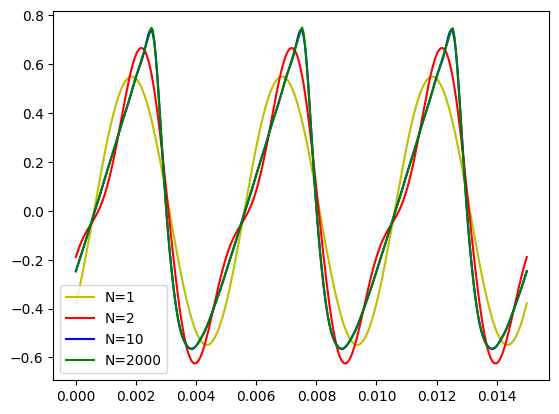

In [9]:
t = np.linspace(0, 15*(10**-3), 300, endpoint=True) 

def expr(n):
    return np.multiply(np.multiply((1/((alpha+n*w0*1j)**2)), cnX(n)), (np.exp(1j*w0*n*t)))

def y(N):
    return alpha**2 * sigma_sum(-N, N, expr)

plt.plot(t, y(1), 'y', label='N=1')
plt.plot(t, y(2), 'r', label='N=2')
plt.plot(t, y(10), 'b', label='N=10')
plt.plot(t, y(2000), 'g', label='N=2000')

plt.legend()
